In [1]:
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
images = []
labels = []

In [4]:
data_path = ".\\dataset\\cifar-10-batches-py\\"

In [5]:
for i in range(1, 6):
    batch = unpickle(os.path.join(data_path, f"data_batch_{i}"))
    images.append(batch[b'data'])
    labels.append(batch[b'labels'])

In [6]:
train_images = np.vstack(images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print(train_images.shape)
print(len(labels[1]))

(50000, 32, 32, 3)
10000


In [7]:
the_label = np.hstack(labels).reshape(50000, 1)
print(the_label.shape)

(50000, 1)


In [8]:
test_batch = unpickle(os.path.join(data_path, f"test_batch"))
test_image = test_batch[b'data']
test_label = test_batch[b'labels']
test = test_image.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [9]:
test.shape
print(len(test_label))

10000


In [10]:
the_image = train_images[64]
the_image = the_image[:, :, 0]
the_image.shape

(32, 32)

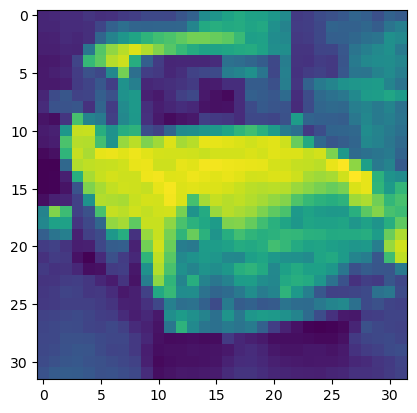

In [11]:
plt.imshow(the_image)
plt.show()

In [12]:
# convs1 = np.random.randint(2, size=(2, 1, 3, 3))
# convs2 = np.random.randint(2, size=(4, 2, 3, 3))
# bias1 = np.zeros(2)
# bias2 = np.zeros(4)
# print(convs1)
# print()
# print(convs2)

In [13]:
convs1 = np.array(
    [
        [
            [[1, 1, 0],
             [0, 0, 0],
             [0, 1, 1]]
        ],
        [
            [[1, 1, 0],
             [1, 0, 0],
             [1, 1, 0]]
        ]
    ],
)
convs2 = np.array(
    [
        [
            [[1, 0, 0],
             [0, 1, 0],
             [1, 0, 1]],

            [[1, 1, 0],
             [1, 1, 1],
             [1, 1, 0]],
        ],
        [
            [[1, 0, 1],
             [0, 0, 1],
             [0, 1, 0]],
            [[1, 1, 1],
             [0, 0, 0],
             [0, 1, 1]]
        ],
        [
            [[1, 0, 1],
             [0, 0, 1],
             [1, 1, 1]],
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]
        ],
        [
            [[1, 1, 0],
             [0, 0, 0],
             [1, 0, 1]],
            [[1, 1, 0],
             [0, 1, 1],
             [0, 1, 1]]
        ]
    ]
)

print(convs1.shape)
print(convs2.shape)

(2, 1, 3, 3)
(4, 2, 3, 3)


In [14]:
bias1 = np.array([0., 0.])
bias2 = np.array([0., 0., 0., 0.])

print(bias1.shape)
print(bias2.shape)

(2,)
(4,)


### The shapes are of shape (2, 1, 3, 3) indicating two filters of shape (1, 3, 3) and (4, 2, 3, 3) indicating four filters of shape (2, 3, 3). The 1 in front of the three dimensions represent the depth of the filters used.

In [15]:
for i in range(2):
    for j in range(1):
        for k in range(3):
            for l in range(3):
                print(convs1[i][j][k][l], end='')
            print('')
        print('')

110
000
011

110
100
110



In [16]:
print(the_image)

[[ 65  67  69 ...  93 108 102]
 [ 65  65  69 ... 104 122 132]
 [ 62  63  68 ... 122 146 140]
 ...
 [ 88  90  95 ...  83  89  92]
 [ 90  94  98 ...  75  78  85]
 [ 95 102 104 ...  74  79  84]]


In [17]:
print(the_image[1][2])

69


In [18]:
the_image[0][5]

np.uint8(71)

In [19]:
the_image = the_image.reshape(1, 32, 32)
print(the_image.shape)

(1, 32, 32)


In [20]:
feature_map = np.zeros((2, 30, 30))
# the shape is 30,30 because the new feature map's shape will be 30,30

#for layer 1
for k in range(2):#means there are 2 Conv filters here
    for l in range(1):#denotes the depth of the filter
        for i in range(30):#along the x-axis
            for j in range(30):#along the y-axis
                feature_map[k][i][j] = (the_image[l][i][j]*convs1[k][l][0][0] + the_image[l][i][j+1]*convs1[k][l][0][1] + the_image[l][i][j+2]*convs1[k][l][0][2]) + (the_image[l][i+1][j]*convs1[k][l][1][0] + the_image[l][i+1][j+1]*convs1[k][l][1][1] + the_image[l][i+1][j+2]*convs1[k][l][1][2]) + (the_image[l][i+2][j]*convs1[k][l][2][0] + the_image[l][i+2][j+1]*convs1[k][l][2][1] + the_image[l][i+2][j+2]*convs1[k][l][2][2]) + bias1[k]
                # print(f'(the_image[{l}][{i}][{j}]*convs1[{k}][{l}][0][0] + the_image[{l}][{i}][{j+1}]*convs1[{k}][{l}][0][1] + the_image[{l}][{i}][{j+2}]*convs1[{k}][{l}][0][2]) + (the_image[{l}][{i+1}][{j}]*convs1[{k}][{l}][1][0] + the_image[{l}][{i+1}][{j+1}]*convs1[{k}][{l}][1][1] + the_image[{l}][{i+1}][{j+2}]*convs1[{k}][{l}][1][2]) + (the_image[{l}][{i+2}][{j}]*convs1[{k}][{l}][2][0] + the_image[{l}][{i+2}][{j+1}]*convs1[{k}][{l}][2][1] + the_image[{l}][{i+2}][{j+2}]*convs1[{k}][{l}][2][2])')
                # print(f"({the_image[l][i][j]}*{convs1[k][l][0][0]} + {the_image[l][i][j+1]}*{convs1[k][l][0][1]} + {the_image[l][i][j+2]}*{convs1[k][l][0][2]}) + ({the_image[l][i+1][j]}*{convs1[k][l][1][0]} + {the_image[l][i+1][j+1]}*{convs1[k][l][1][1]} + {the_image[l][i+1][j+2]}*{convs1[k][l][1][2]}) + ({the_image[l][i+2][j]}*{convs1[k][l][2][0]} + {the_image[l][i+2][j+1]}*{convs1[k][l][2][1]} + {the_image[l][i+2][j+2]}*{convs1[k][l][2][2]})")

                
print(feature_map)
print(feature_map.shape)

[[[263. 270. 275. ... 456. 466. 487.]
  [256. 263. 326. ... 491. 502. 500.]
  [245. 278. 400. ... 513. 528. 549.]
  ...
  [359. 372. 376. ... 321. 354. 354.]
  [367. 380. 384. ... 307. 327. 340.]
  [384. 392. 396. ... 299. 316. 335.]]

 [[322. 332. 341. ... 553. 551. 573.]
  [314. 323. 335. ... 585. 607. 634.]
  [301. 312. 346. ... 619. 655. 695.]
  ...
  [439. 452. 468. ... 389. 431. 433.]
  [447. 464. 481. ... 371. 397. 413.]
  [465. 485. 498. ... 363. 377. 400.]]]
(2, 30, 30)


In [21]:
#think we should apply a reLu operation right about here...
def relu(z):
    return np.maximum(0, z)

relued = relu(feature_map)

In [22]:
print(relued.shape)

(2, 30, 30)


In [23]:
#I JUST REALIZED WE'RE TOTALLY MISSING A MAX-POOLING LAYER OR TWO SO HAVE TO INCLUDE THAT AS WELL IN OUR NETWORK
max_pool = np.ones((2, 15, 15))
for k in range(2):
    a = 0
    for i in range(0, 30, 2):
        b = 0
        for j in range(0, 30, 2):
            max_pool[k][a][b] = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
            b += 1
        a += 1

print(max_pool)
print(max_pool.shape)

[[[ 270.  458.  635.  691.  654.  596.  656.  692.  676.  637.  510.
    364.  437.  491.  502.]
  [ 278.  515.  754.  766.  621.  542.  545.  635.  614.  542.  496.
    325.  435.  513.  559.]
  [ 308.  450.  652.  739.  410.  307.  300.  336.  491.  471.  424.
    417.  473.  576.  598.]
  [ 452.  506.  420.  534.  346.  282.  308.  263.  364.  404.  465.
    461.  528.  569.  577.]
  [ 574.  736.  598.  729.  654.  566.  620.  640.  628.  653.  620.
    547.  450.  545.  527.]
  [ 623.  927.  888.  930.  913.  940.  958.  971.  962.  948.  939.
    827.  701.  587.  534.]
  [ 463.  908.  953.  961.  973.  954.  961.  964.  947.  951.  949.
    911.  934.  940.  618.]
  [ 483.  767.  914.  934.  969.  966.  937.  939.  936.  908.  879.
    811.  852.  927.  819.]
  [ 599.  430.  886.  884.  932.  884.  766.  878.  867.  806.  747.
    697.  670.  755.  826.]
  [ 456.  357.  536.  687.  902.  779.  683.  696.  757.  744.  686.
    678.  665.  619.  773.]
  [ 318.  287.  351.  371.  85

In [24]:
# feature_map_ii = np.zeros((4, 12, 12))
# # the shape is 12,12 because the new feature map's shape will be 12, 12

# #for layer 2
# for k in range(4):#means there are 4 Conv filters here
#     #akshually the feature map has size 2, 12, 12 and there are 4 layers here i.e. 4 conv layers so we do the operation accordingly
#     for l in range(2):
#         for i in range(12):#along the x-axis
#             for j in range(12):#along the y-axis
#                 feature_map_ii[k][i][j] = the_image[i][j] * convs2[k][0][0] + the_image[i][j+1] * convs2[k][0][1] + the_image[i][j+2] * convs2[k][0][2]\
#                 + the_image[i+1][j] * convs2[k][1][0] + the_image[i+1][j+1] * convs2[k][1][1] + the_image[i+1][j+2] * convs2[k][1][2]\
#                 + the_image[i+2][j] * convs2[k][2][0] + the_image[i+2][j+1] * convs2[k][2][1] + the_image[i+2][j+2] * convs2[k][2][2]

# print(feature_map_ii)
# print(feature_map_ii.shape)

In [25]:
feature_map_ii = np.zeros((4, 12, 12))

for k in range(4):#means there are 4 Conv filters here
    for l in range(1):#denotes the depth of the filter but we'll simply put the variable as it is and perform two depth layer calculation at the same time
        for i in range(12):#along the x-axis
            for j in range(12):#along the y-axis
                feature_map_ii[k][i][j] = (max_pool[l][i][j]*convs2[k][l][0][0] + max_pool[l][i][j+1]*convs2[k][l][0][1] + max_pool[l][i][j+2]*convs2[k][l][0][2] + max_pool[l][i+1][j]*convs2[k][l][1][0] + max_pool[l][i+1][j+1]*convs2[k][l][1][1] + max_pool[l][i+1][j+2]*convs2[k][l][1][2] + max_pool[l][i+2][j]*convs2[k][l][2][0] + max_pool[l][i+2][j+1]*convs2[k][l][2][1] + max_pool[l][i+2][j+2]*convs2[k][l][2][2]) + (max_pool[l+1][i][j]*convs2[k][l+1][0][0] + max_pool[l+1][i][j+1]*convs2[k][l+1][0][1] +  max_pool[l+1][i][j+2]*convs2[k][l+1][0][2] + max_pool[l+1][i+1][j]*convs2[k][l+1][1][0] + max_pool[l+1][i+1][j+1]*convs2[k][l+1][1][1] + max_pool[l+1][i+1][j+2]*convs2[k][l+1][1][2] + max_pool[l+1][i+2][j]*convs2[k][l+1][2][0] + max_pool[l+1][i+2][j+1]*convs2[k][l+1][2][1] + max_pool[l+1][i+2][j+2]*convs2[k][l+1][2][2]) + bias2[k]

print(feature_map_ii)
print(feature_map_ii.shape)

[[[ 4994.  7059.  8338.  8137.  6817.  6394.  6858.  7060.  7089.  6441.
    5405.  5252.]
  [ 4952.  6742.  7576.  7042.  5463.  4722.  5055.  5571.  5972.  5823.
    5583.  5581.]
  [ 5854.  7299.  7688.  7287.  5744.  5046.  5255.  5761.  6336.  6470.
    6233.  6247.]
  [ 7714.  9134.  9118.  9134.  8321.  8103.  8303.  8368.  8665.  8610.
    8083.  7421.]
  [ 8574. 11060. 11057. 11190. 10965. 10830. 11047. 11114. 11072. 10924.
   10412.  9493.]
  [ 8487. 11119. 11856. 12065. 12118. 12127. 12123. 12115. 12014. 11803.
   11476. 10949.]
  [ 8014.  9993. 11635. 11921. 11913. 11747. 11484. 11629. 11460. 11048.
   10508. 10378.]
  [ 6680.  8368. 10180. 11036. 11395. 10700. 10379. 10561. 10457.  9989.
    9436.  9083.]
  [ 5518.  5875.  8238.  9698. 10620.  9742.  8881.  9337.  9525.  9086.
    8693.  8238.]
  [ 4406.  4430.  5895.  8114.  9728.  8883.  7868.  8169.  8545.  8498.
    8258.  7637.]
  [ 4110.  3948.  4548.  6385.  8342.  8126.  7250.  7390.  7859.  7841.
    7537.  6776.]

In [26]:
def relu_again(z):
    return np.maximum(0, z)

relued_again = relu(feature_map_ii)

In [27]:
print(relued_again.shape)

(4, 12, 12)


In [28]:
max_pool_ii = np.ones((4, 6, 6))
for k in range(4):
    a = 0
    for i in range(0, 12, 2):
        b = 0
        for j in range(0, 12, 2):
            max_pool_ii[k][a][b] = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
            b += 1
        a += 1

print(max_pool_ii)
print(max_pool_ii.shape)

[[[ 7059.  8338.  6817.  7060.  7089.  5583.]
  [ 9134.  9134.  8321.  8368.  8665.  8083.]
  [11119. 12065. 12127. 12123. 12014. 11476.]
  [ 9993. 11921. 11913. 11629. 11460. 10508.]
  [ 5875.  9698. 10620.  9337.  9525.  8693.]
  [ 4376.  6385.  8342.  7390.  7859.  7537.]]

 [[ 6098.  6532.  5564.  6062.  5699.  4779.]
  [ 6764.  6532.  5884.  5898.  6208.  5945.]
  [ 9424.  9686.  9697.  9749.  9608.  8603.]
  [ 9208.  9728.  9525.  9477.  9171.  8617.]
  [ 5905.  8913.  8305.  7971.  7740.  6964.]
  [ 3424.  6074.  6934.  6267.  6506.  5886.]]

 [[ 3756.  3711.  2872.  3169.  3068.  2972.]
  [ 4514.  4165.  4085.  4201.  4298.  3910.]
  [ 5433.  5693.  5717.  5679.  5573.  5116.]
  [ 5003.  5597.  5453.  5374.  5195.  4900.]
  [ 3010.  4547.  4605.  4409.  4335.  4027.]
  [ 2039.  3271.  3670.  3581.  3765.  3318.]]

 [[ 6853.  7302.  5824.  6547.  6409.  5252.]
  [ 7968.  8088.  7220.  7298.  7595.  6915.]
  [10414. 10874. 10897. 10950. 10771. 10075.]
  [ 9803. 10817. 10542. 1047

In [29]:
#now we flatten the layers

flattened = max_pool_ii.flatten()
print(flattened.shape)

(144,)


In [30]:
flattened = flattened.reshape(144, 1)
print(flattened.shape)

(144, 1)


In [31]:
#here's the vanilla neural network part of the CNN

w1 = np.random.rand(50, 144)-1 #decreased 1 since the softmax value was causing errors
b1 = np.random.rand(50, 1)-1
w2 = np.random.rand(50, 10)-1
b2 = np.random.rand(10, 1)-1

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    probs = np.exp(z) / sum(np.exp(z))
    return probs

def forward(w1, b1, w2, b2, data):
    z1 = np.dot(w1, data) + b1
    a1 = relu(z1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = softmax(z2)
    return a2, z1, a1, z2

the_val, z1, a1, z2 = forward(w1, b1, w2, b2, flattened)

print(np.argmax(the_val, 0))

[4]


In [32]:
prediction_num = np.argmax(the_val, 0)
print(type(prediction_num))
print(prediction_num)
a = prediction_num[0]
print(a)
print(type(a))

<class 'numpy.ndarray'>
[4]
4
<class 'numpy.int64'>


In [33]:
def the_value(label):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return labels[label]

predicted_num = np.argmax(the_val, 0)
predicted_int = predicted_num[0]
prediction = the_value(predicted_int)
print(prediction)

deer


### We've successfully implemented the forward propagation part of the CNN. Now it's time for backward prop.

# Now we propagate backwards

### One Hot Encoding

In [34]:
#we should perhaps preform One hot encoding to transform our label classes into the form that is usable in training process

total_classes = 10

hot_encoded_arr = np.zeros((total_classes, 1))
hot_encoded_arr[the_label[64][0]] = 1  # put the corresponding value in the hot_encoded_arr as 1

In [35]:
print(hot_encoded_arr)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Backwards propagation in the Neural network part of the CNN.

In [36]:
#we will be skipping the gradient calculation for softmax function as it won't affect the learning that much, or so as I heard
dz2 = hot_encoded_arr - the_val
print(dz2)
print(dz2.shape)

[[-0.07824379]
 [ 0.89533523]
 [-0.09819011]
 [-0.0758603 ]
 [-0.14166216]
 [-0.11816574]
 [-0.08358583]
 [-0.09844508]
 [-0.13661849]
 [-0.06456372]]
(10, 1)


In [37]:
num_data = 10

In [38]:
dw2 = 1/num_data * dz2.dot(a1.T)
db2 = 1/num_data * np.sum(dz2)

In [39]:
def diff_relu(z):
    return z > 0

In [40]:
dz1 = w2.dot(dz2)*diff_relu(z1)
print(dz1)
print(dz1.shape)

[[ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]]
(50, 1)


In [41]:
dw1 = 1/num_data * dz1.dot(flattened.T)
db1 = 1/num_data * np.sum(dz1)

In [42]:
print(dz1.shape)
print(dw1.shape)
print(db1.shape)

(50, 1)
(50, 144)
()


In [43]:
print(db1)

0.0


### For the second convolutional layer of the CNN

In [44]:
df = dw1.T.dot(dz1)
print(df.shape) #hopefully its shape is (144, 1)

(144, 1)


In [45]:
#now we have to reshape df array into the shape that it requires to be in the shape of pooling layer from previous layer
dp2 = df.reshape((4, 6, 6)) #gradient for pooling layer

In [59]:
def max_pool_backward(dp2, relued_again):
    d_relued_again = np.zeros_like(relued_again)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                #fuck it. I just can't find the function to find the index of the maximum array or my brain isn't working rn, so m gonna use if here
                if the_max == relued_again[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued_again[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued_again[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued_again[k][i_is][j_is] = dp2[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued_again

d_relued_again = max_pool_backward(dp2, relued_again)
# print(d_relued_again)
print(d_relued_again.shape)

(4, 12, 12)


### I have tried doing this back-propagation in max-pooling layer to the best of my ability but I don't quite know if this has been performed correctly or not. Would have to double check things after I start getting positive gradients or any gradients at all!

### For the gradient calculation of the relu of the second convolutional layer, we'll be using the already built diff_relu function

In [60]:
# We'll just pass the relued_again to the differentation calculator of relu function. That's the only step required here I suppose and we should
# be okay using the relued_again array in the convolutional layer now.

diff_relu(d_relued_again)
print(d_relued_again.shape)
# print(d_relued_again)

(4, 12, 12)
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 

## Now it's the endgame innit? I haven't yet idea how we're going to do it and what exactly to do. I just can solve things in pen and paper but I don't quite know what it'll be like in the real solution in terms of code.

### As per the theory I recall that the gradient for the filter K = convolution(X, dz)  where, X = input from previous layer and dz is the gradient that has been received from the previous layer.

### In our case the gradient is d_relued_again and the value of X is 'max_pool' variable. Another problem that we have here is that we have a bigger filter size, so its not gonna be that easy or feasible to perform the convolution operation like we did in the forward passing taking only 3*3 pixel values at a time. We have to be smarter with our code usage if we don't want to perform errors or repeat code. The total 'IMAGE' to convolve over is of size (4, 15, 15) and the 'FILTER' that we'll be using to convolve will be of size (4, 12, 12) and this should result in a gradient for the filter of size (4, 3, 3) which should be usable to backpropagate the filter.

In [ ]:
d_fliter = np.zeros((4, 3, 3))
for filter_num in range(4):
    for i in range(3):
        for j in range(3):
            added_value = 0
            #add the sum of convolution layer
            for k in range(12):
                for l in range(12):
                    added_value += max_pool[][k][l] * d_relued_again[filter_num][k][l]
            d_filter[filter_num][i][j] = added_value